# **Mission 2.** Abengers, Assemble!

In [1]:
## 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### **Dataset** : [Marvel Superheroes](https://www.kaggle.com/dannielr/marvel-superheroes?select=charcters_stats.csv)

In [2]:
## 데이터 불러오기

stats_df = pd.read_csv("/content/drive/MyDrive/programmers_kdt_II/day5_mission/charcters_stats.csv")

## **Core Mission**

**다음 질문에 답하시오.**
  * 캐릭터는 저마다 지능, 힘 등 다양한 수치를 지니고 있다.  
  이러한 **수치의 합이 가장 큰 캐릭터**는 누구인가? 이를 보이기 위한 과정을 보여라.
  * 좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포를 알고 싶다.  
  이를 표현하기 위한 적절한 그래프를 선택해서 이를 위한 전처리를 진행하고, 시각화하여라.

In [3]:
## 상위 5개 데이터 확인하기

stats_df.head(5)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


In [4]:
## 데이터 전체 정보

stats_df.describe()

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
mean,44.502455,29.083470,27.306056,41.839607,40.312602,43.206219,226.250409
std,32.924722,32.610939,25.760173,36.543849,34.539910,33.270329,167.324034
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
50%,50.000000,10.000000,23.000000,32.000000,37.000000,50.000000,255.000000
75%,75.000000,53.000000,42.000000,80.000000,67.000000,70.000000,351.500000
max,113.000000,100.000000,100.000000,120.000000,100.000000,101.000000,581.000000


In [5]:
## 결측치 확인

stats_df.isnull().sum()

# Alignment 결측치 발견

Name            0
Alignment       3
Intelligence    0
Strength        0
Speed           0
Durability      0
Power           0
Combat          0
Total           0
dtype: int64

In [6]:
## 결측치 제거

stats_df = stats_df.dropna()
stats_df.isnull().sum()

Name            0
Alignment       0
Intelligence    0
Strength        0
Speed           0
Durability      0
Power           0
Combat          0
Total           0
dtype: int64

### **수치의 합이 가장 큰 캐릭터**는?

In [7]:
stats_df.sort_values('Total', ascending=False).head(1)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
361,Martian Manhunter,good,100,100,96,100,100,85,581


### 좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포

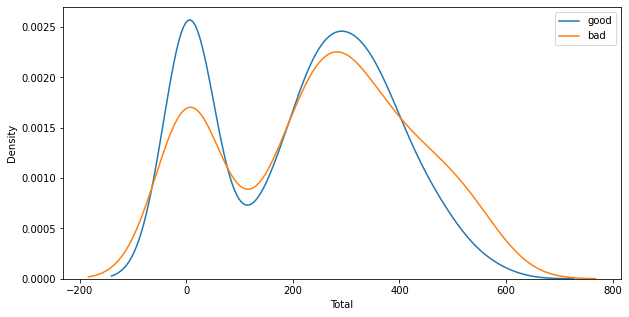

In [8]:
## 캐릭터 특성에 따른 능력치 합에 대한 분포

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(x=stats_df[stats_df.Alignment == 'good']['Total'], ax=ax)
sns.kdeplot(x=stats_df[stats_df.Alignment == 'bad']['Total'], ax=ax)

plt.legend(['good', 'bad'])

plt.show()

In [9]:
## 좋은 캐릭터 df

stats_g_df = stats_df[stats_df['Alignment'] == 'good']
stats_g_df.head(5)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
6,Adam Monroe,good,63,10,12,100,71,64,320


In [10]:
## 나쁜 캐릭터 df

stats_b_df = stats_df[stats_df['Alignment'] == 'bad']
stats_b_df.head(5)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
4,Abomination,bad,63,80,53,90,55,95,436
5,Abraxas,bad,88,100,83,99,100,56,526
11,Air-Walker,bad,50,85,100,85,100,40,460
16,Amazo,bad,75,100,100,100,100,100,575
17,Ammo,bad,1,1,1,1,0,1,5


In [11]:
## 캐릭터 특성에 따른 능력치들 평균 df

df = pd.DataFrame({
        'Alignment': ['good', 'bad'],
        'Intelligence': [stats_g_df['Intelligence'].mean(), stats_b_df['Intelligence'].mean()],
        'Strength': [stats_g_df['Strength'].mean(), stats_b_df['Strength'].mean()],
        'Speed': [stats_g_df['Speed'].mean(), stats_b_df['Speed'].mean()],
        'Durability': [stats_g_df['Durability'].mean(), stats_b_df['Durability'].mean()],
        'Power': [stats_g_df['Power'].mean(), stats_b_df['Power'].mean()],
        'Combat': [stats_g_df['Combat'].mean(), stats_b_df['Combat'].mean()]
    })
df

,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat
0,good,41.995370,26.638889,26.685185,39.293981,38.291667,42.085648
1,bad,50.018182,34.363636,27.684848,46.284848,44.230303,44.630303


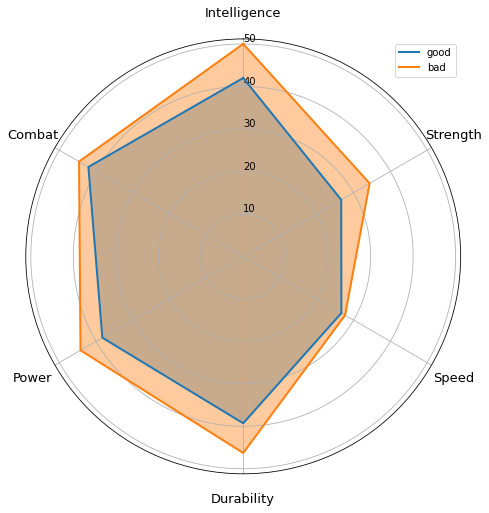

In [12]:
## 능력치에 대한 방사형 그래프

from math import pi


labels = df.columns[1:]
num_labels = len(labels)
    
angles = [x / float(num_labels) * (2 * pi) for x in range(num_labels)]
angles += angles[:1]

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(polar=True)
for i, row in df.iterrows():
    data = df.iloc[i].drop('Alignment').tolist()
    data += data[:1]

    ax.set_rlabel_position(0)

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    ax.tick_params(axis='x', which='major', pad=15)

    ax.fill(angles, data, alpha=0.4)
    ax.plot(angles, data, linewidth=2, linestyle='solid', label=row.Alignment)

    plt.xticks(angles[:-1], labels, fontsize=13)

plt.legend()

plt.show()

좋은 캐릭터보다 나쁜 캐릭터의 평균 능력치가 높다.

## **Extra Mission**

**다음 질문에 답하시오.**
  * 캐릭터는 저마다 지능, 힘 등 다양한 수치를 지니고 있다. 또한 각 캐릭터는 DC, 마블 등 다양한 코믹스 회사를 바탕으로 하고 있다.  
  어떤 코믹스 회사의 캐릭터들이 능력치 합의 평균이 가장 큰가? 이를 보이기 위한 과정을 보여라.
  * 좋은 캐릭터와 나쁜 캐릭터가 격돌한다고 한다. 격돌하는 경우 캐릭터들의 능력치의 합의 평균이 큰 팀이 이긴다고 한다.  
단, 불의를 못참는 중립 캐릭터들은 중립캐릭터가 없었을 당시에 열세인 팀에 가담한다.  
이러한 상황일때 결과적으로 어떤 캐릭터 진영이 승리할 것인가? 이를 보이기 위한 과정을 보여라.
  * **이 데이터를 이용해 진행하고 싶은 EDA 및 시각화가 있다면 자유롭게 진행하여라.**  
  * 이 과제는 핵심 임무 이후에 진행되어야 한다.

In [13]:
## 데이터 불러오기

info_df = pd.read_csv("/content/drive/MyDrive/programmers_kdt_II/day5_mission/marvel_characters_info.csv")

In [14]:
## 상위 5개 데이터 확인하기

info_df.head(5)

,ID,Name,Alignment,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
0,0,A-Bomb,good,Male,yellow,Human,No Hair,Marvel Comics,-,203.0,441.0
1,1,Abe Sapien,good,Male,blue,Icthyo Sapien,No Hair,Dark Horse Comics,blue,191.0,65.0
2,2,Abin Sur,good,Male,blue,Ungaran,No Hair,DC Comics,red,185.0,90.0
3,3,Abomination,bad,Male,green,Human / Radiation,No Hair,Marvel Comics,-,203.0,441.0
4,4,Abraxas,bad,Male,blue,Cosmic Entity,Black,Marvel Comics,-,-99.0,-99.0


In [15]:
## 데이터 병합

df = pd.DataFrame({
    "Name": info_df['Name'],
    "Publisher": info_df['Publisher']
})

merge_df = pd.merge(stats_df, df, on="Name")
merge_df.head(5)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Publisher
0,A-Bomb,good,38,100,17,80,17,64,316,Marvel Comics
1,Abe Sapien,good,88,14,35,42,35,85,299,Dark Horse Comics
2,Abin Sur,good,50,90,53,64,84,65,406,DC Comics
3,Abomination,bad,63,80,53,90,55,95,436,Marvel Comics
4,Abraxas,bad,88,100,83,99,100,56,526,Marvel Comics


In [16]:
## 결측치 확인

merge_df.isnull().sum()

# Publisher 결측치 발견

Name            0
Alignment       0
Intelligence    0
Strength        0
Speed           0
Durability      0
Power           0
Combat          0
Total           0
Publisher       7
dtype: int64

In [17]:
merge_df['Publisher'].value_counts(dropna=False)

Marvel Comics        347
DC Comics            171
NBC - Heroes          19
Image Comics          13
Dark Horse Comics      8
NaN                    7
HarperCollins          6
Team Epic TV           5
SyFy                   5
Icon Comics            4
ABC Studios            4
Wildstorm              2
Shueisha               2
Microsoft              1
Sony Pictures          1
Hanna-Barbera          1
Universal Studios      1
Name: Publisher, dtype: int64

In [18]:
## NaN -> etc.

merge_df['Publisher'] = merge_df['Publisher'].fillna('etc.')
merge_df['Publisher'].value_counts(dropna=False)

Marvel Comics        347
DC Comics            171
NBC - Heroes          19
Image Comics          13
Dark Horse Comics      8
etc.                   7
HarperCollins          6
Team Epic TV           5
SyFy                   5
Icon Comics            4
ABC Studios            4
Shueisha               2
Wildstorm              2
Hanna-Barbera          1
Sony Pictures          1
Universal Studios      1
Microsoft              1
Name: Publisher, dtype: int64

### 어떤 코믹스 회사의 캐릭터들이 능력치 합의 평균이 가장 큰가?

In [19]:
merge_df[['Publisher', 'Total']].groupby(['Publisher']).mean().sort_values('Total', ascending=False).head(5)

,Total
Publisher,
Shueisha,481.500000
Microsoft,425.000000
Sony Pictures,398.000000
DC Comics,254.888889
Marvel Comics,243.357349


`Shueisha` 캐릭터들의 능력치 합이 제일 크고, `Microsoft`, `Sony Pictures` 순이다.  
캐릭터 수가 많다고 능력치 합의 평균도 높은 건 아니다.

### 좋은 캐릭터와 나쁜 캐릭터가 격돌할 때 어떤 캐릭터 진영이 승리할 것인가?
  * 단, 불의를 못참는 중립 캐릭터들은 중립캐릭터가 없었을 당시에 열세인 팀에 가담한다.

In [20]:
stats_df[['Alignment', 'Total']].groupby(['Alignment']).mean()

,Total
Alignment,
bad,247.212121
good,214.990741
neutral,355.363636


나쁜 캐릭터 팀의 능력치 합의 평균이 더 크기 때문에 중립 캐릭터들은 좋은 캐릭터 팀에 합세한다.

In [21]:
stats_df[(stats_df.Alignment == 'good') | (stats_df.Alignment == 'neutral')]['Total'].mean()

218.4762979683973

중립 캐릭터가 열세인 좋은 캐릭터 팀에 합세해도 나쁜 캐릭터 팀보다 능력치 합의 평균이 낮다.  
결국, 나쁜 캐릭터 진영이 승리한다.